# Processamento do Texto

Esse notebook as funções para fazer o pré-processamento dos textos do diários com foco em extrair uma representação textual dos textos, extração dos termos mais frequentes e análise de similaridade dos textos. 

## Imports Necessários

In [1]:
!pip install spacy
!pip install unidecode
!python -m spacy download pt_core_news_lg
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE


     -------------------------------------- 568.2/568.2 MB 4.5 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('pt_core_news_lg')


In [2]:

# Código para poder usar os módulos implementados nesse repositório no notebook 
import sys, os
path_module = os.path.abspath('../modules/')
if path_module not in sys.path:
    sys.path.append(path_module)

# import preprocess.pre_process_text as pp    

In [3]:
# Imports para o projeto
from sklearn.feature_extraction.text import TfidfVectorizer
from preprocess.pre_process_text import PreProcessText
from preprocess.plot_embeddings import PlotEmbeddings
# from nlp.extract_topics import ExtractTopics
from bertopic import BERTopic
from utils.process_gazette import ProcessGazette


## Processamento do Texto

In [4]:
pe = PlotEmbeddings("pt_core_news_lg")

In [5]:
pp = PreProcessText("pt_core_news_lg")

In [6]:
# tokens_teste = pp.process_text("Hoje visitei a velha estação de trem. A estação estava coberta de abandono. Porque, hoje, as pessoas parecem não dar bola para construções velhas como essa da estação de trem. Muitas pessoas só querem saber de coisas futuras. Dão bola só para coisas novas.")

In [7]:
# texto_teste1 = ' '.join(tokens_teste)

In [8]:
# vetorizador = TfidfVectorizer()
# print(texto_teste1)

In [9]:
# vetor_tfidf = vetorizador.fit_transform([texto_teste1])

In [10]:
# indices_palavras_frequentes1 = vetor_tfidf.toarray().argsort()[0][-5:][::-1]
# palavras_frequentes1 = [vetorizador.get_feature_names()[i] for i in indices_palavras_frequentes1]

In [11]:
# print(palavras_frequentes1)

## Processamento do Diário Teste

In [60]:
from bertopic import BERTopic

pp = PreProcessText("pt_core_news_lg")

class ExtractTopics:
    def __init__(self):
        self.bert_model = BERTopic(language="portuguese", min_topic_size=2)

    def extract_topics(self, texts):
        # Certifique-se de que 'texts' seja uma lista de documentos
        if not isinstance(texts, list):
            raise ValueError("O argumento 'texts' deve ser uma lista de documentos.")

        # Ajuste o modelo BERTopic com os documentos
        model_ = self.bert_model.fit_transform(texts)
        topics = model_.get_topics()

        return topics

In [61]:
extractor = ExtractTopics()

In [100]:
pg = ProcessGazette(BASE_DIR="gazettes/")
all_pages_list = []
for file in files:
    if file.endswith(".txt"):  # Verifique se o arquivo é um arquivo de texto (ajuste conforme necessário)
        all_pages = pg.break_pages(file, "ANO [X|V|I]+ ")
        for page in all_pages:
            all_pages_list.append(all_pages)

In [101]:
topics_ = {}

# Loop para associar tópicos a cada página em 'all_pages_list'
for index, page_data in enumerate(all_pages_list):
    texto_teste = page_data.get('text', '')  # Acesse o texto bruto da página com uma verificação

    # Verifique se o texto não está vazio
    if texto_teste:
        # Realize o pré-processamento do 'texto_teste' conforme necessário
        preprocessed_text = pp.process_text(texto_teste.lower())  # Aplique 'lower()' ao texto bruto

        # Verifique se o pré-processamento não retornou uma lista vazia
        if preprocessed_text:
            # Extraia os tópicos a partir do 'preprocessed_text'
            topics = extractor.extract_topics(preprocessed_text)  # Substitua 'extract_topics' com sua função real de extração de tópicos

            # Associe o texto e os tópicos à página
            topics_[index] = {'text': texto_teste, 'topics': topics}
       



In [102]:
topics_ = {}
for page, texto_teste in all_pages_list.items():
    topics_[page] = {'text': texto_teste, 'topics': []}

In [80]:
all_pages_list

[{0: ' SALVADOR • BAHIA • SÁBADO A SEGUNDA-FEIRA,  16 A 18 DE SETEMBRO DE 2023   ',
  1: '| N º 8.621  S U M Á R I O EXECUTIVO  2 DECRETOS FINANCEIROS  2 DECRETOS NUMERADOS  3 DECRETOS SIMPLES  5 SECRETARIA MUNICIPAL DA FAZENDA - SEFAZ  6  CONSELHO MUNICIPAL DE TRIBUTOS - CMT  6  SECRETARIA MUNICIPAL DE GESTÃO - SEMGE  6 SECRETARIA MUNICIPAL DA EDUCAÇÃO - SMED  9 SECRETARIA MUNICIPAL DA SAÚDE - SMS  10 SECRETARIA MUNICIPAL DE COMUNICAÇÃO - SECOM  11 SECRETARIA MUNICIPAL DE POLÍTICAS PARA MULHERES, INFÂNCIA E JUVENTUDE - SPMJ  11 SECRETARIA MUNICIPAL DE DESENVOLVIMENTO URBANO - SEDUR  11 SECRETARIA MUNICIPAL DE MOBILIDADE - SEMOB  12  SUPERINTENDÊNCIA DO TRÂNSITO DO SALVADOR - TRANSALVADOR  12  SECRETARIA MUNICIPAL DE ORDEM PÚBLICA - SEMOP  13 GUARDA CIVIL MUNICIPAL - GCM  13  LICITAÇÕES  20 SECRETARIA MUNICIPAL DA EDUCAÇÃO - SMED  20 SECRETARIA MUNICIPAL DA SAÚDE - SMS  20 SECRETARIA MUNICIPAL DE POLÍTICAS PARA MULHERES, INFÂNCIA E JUVENTUDE - SPMJ  20 SECRETARIA MUNICIPAL DE DESENVOLV

In [59]:
# #tokens_ = pp.process_text(topics_[1]['text'])
# tokens_ = pp.process_text(topics_[1]['text'])
# print(tokens_)

In [91]:
print(topics_[1]['text'])

KeyError: 1

In [90]:
texto = ' '.join(topics_[1]['text'])
vetorizador = TfidfVectorizer()

KeyError: 1

In [87]:
print(texto)

T e x t o   o r i g i n a l   v a z i o


In [ ]:
vetor_tfidf = vetorizador.fit_transform([texto])

In [22]:
#ordeno os indices do vetor tfidf e pego os 10 maiores, 0 seria a unica linha que tenho, 50 mais relevantes, -1 para inverter a ordem
indices_palavras_frequentes = vetor_tfidf.toarray().argsort()[0][-100:][::-1]
palavras_frequentes = [vetorizador.get_feature_names()[i] for i in indices_palavras_frequentes]

In [23]:
print(indices_palavras_frequentes)

[39 53 52 48 19 29 60 66 67 62 15 34 44 38 31 40 21 13 12 43 45 24 59 64
 54  6 63 22  1 20 18  2 17 11  3 23  4 14  5  7  8  9 10 16 33 25 47 65
 61 58 57 56 55 51 50 49 46 26 42 41 37 36 35 32 30 28 27  0]


In [24]:
print(palavras_frequentes)

['municipal', 'secretaria', 'salvador', 'publico', 'educacao', 'gestao', 'superintendencia', 'turismo', 'urbano', 'tecnologia', 'desenvolvimento', 'inovacao', 'procuradoria', 'mobilidade', 'guarda', 'municipio', 'esporte', 'decreto', 'cultura', 'pobreza', 'promocao', 'fazenda', 'social', 'transito', 'secult', 'combater', 'transalvador', 'estar', 'animal', 'empresa', 'edital', 'bahia', 'diverso', 'convenio', 'bem', 'executivo', 'cidade', 'defesa', 'codesal', 'comite', 'companhia', 'comunicacao', 'contrato', 'diario', 'infraestrutura', 'feira', 'publicacao', 'tributo', 'sustentabilidade', 'sexta', 'setembro', 'servico', 'seinfra', 'saltur', 'resiliencia', 'regulador', 'protecao', 'financeiro', 'oficial', 'numerar', 'mattos', 'manutencao', 'licitacao', 'informacao', 'gregorio', 'fundacao', 'fiscalizadora', 'agencia']


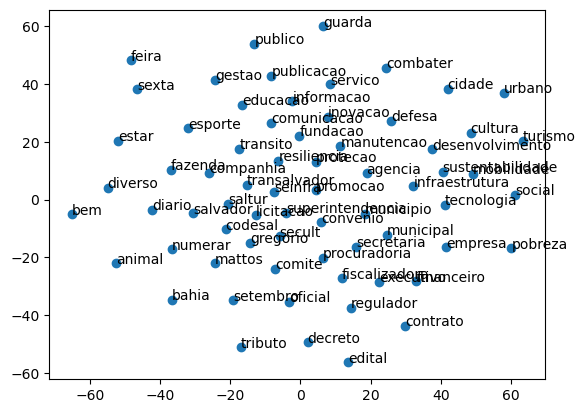

In [25]:
pe.plot_embeddings(palavras_frequentes)